# Projekt zaliczeniowy z Analizy Danych 

### Analiza 'Global Terrorism Database', datasetu zawierającego ponad 200 000 aktów terroryzmu od 1970 do 2017 roku. 
### Głownie będziemy się skupiać na pokazaniu zdolności do: 
#### 1) Czytania danych
#### 2) Oczyszczania danych
#### 3) Transformacji danych
#### 4) Formułowania wniosków na podstawie uzyskanych nowych danych

##### Dataset url: https://www.kaggle.com/datasets/START-UMD/gtd/data

#### Codebook będący przewodnikiem po datasecie: http://start.umd.edu/gtd/downloads/Codebook.pdf

### 1) Odczyt i wstępne oczyszczanie danych

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow
import pdfplumber
from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None) # wymagane by widzieć wszystkie kolumny zawarte w df

In [63]:
df_columns_type = {'eventid': 'int64',
                   'iyear':'int16',
                   'imonth':'int16',
                   'iday':'int16',
                   'approxdate':'str',
                   'extended':'bool',
                   'country':'int16',
                   'country_txt':'str',
                   'provstate':'str'
                  }

In [64]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', 
                 encoding_errors='ignore',
                 dtype=df_columns_type,
                 engine='pyarrow',
                 encoding='latin-1')

In [65]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,False,None,58,Dominican Republic,2,Central America & Caribbean,None,Santo Domingo,18.456792,-69.951164,1.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,1,Assassination,NaN,None,NaN,None,14,Private Citizens & Property,68.0,Named Civilian,None,Julio Guzman,58.0,Dominican Republic,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,MANO-D,None,None,None,None,None,None,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,0.0,NaN,NaN,NaN,NaN,None,None,0.0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,False,None,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,None,NaN,None,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,23rd of September Communist League,None,None,None,None,None,None,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,1.0,1.0,0.0,NaN,NaN,None,Mexico,1.0,800000.0,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,False,None,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,1,Assassination,NaN,None,NaN,None,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Unknown,None,None,None,None,None,None,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,0.0,NaN,NaN,NaN,NaN,None,None,0.0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,False,None,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,3,Bombing/Explosion,NaN,None,NaN,None,7,Government (Diplomatic),46.0,Embassy/Consulate,None,U.S. Embassy,217.0,United States,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Unknown,None,None,None,None,None,None,0.0,NaN,NaN,0,

#### 1.1) Zgodnie z codebookiem, jesli nie było możliwości określenia daty, miesiące oznaczano jako '0' 
#### Sprawdźmy te wartości

In [66]:
df['imonth'].value_counts().sort_values(ascending=True, 
                                        ignore_index=True)

0        20
1     13496
2     13879
3     14180
4     14906
5     14936
6     15152
7     15257
8     15359
9     15563
10    15800
11    16268
12    16875
Name: count, dtype: int64

#### Jak widać, mamy tylko 20 takich przypadków. Rzućmy na nie okiem

In [67]:
df.loc[df['imonth'] == 0]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1,197000000002,1970,0,0,None,False,None,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,None,NaN,None,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,23rd of September Communist League,None,None,None,None,None,None,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,1.0,1.0,0.0,NaN,NaN,None,Mexico,1.0,800000.0,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,0,1,1,1,None
1123,197200000002,1972,0,0,None,False,None,160,Philippines,5,Southeast Asia,Capiz,Roxas,11.586558,122.753716,1.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,3,Bombing/Explosion,NaN,None,NaN,None,6,Airports & Aircraft,42.0,Aircraft (not at an airport),None,air manila fokker F-27p,160.0,Philippines,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,Unknown,None,None,None,None,None,None,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,6,Explosives,7.0,Grenade,6.0,Explosives,16.0,Unknown Explosive Type,NaN,None,NaN,None,NaN,None,NaN,None,Explosive; Grenade,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),200000.0,None,0.0,NaN,NaN,NaN,NaN,None,None,0.0,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,PGIS,-9,-9,0,-9,None
1690,197300000001,1973,0,0,None,True,12/1/1973,45,Colombia,3,South America,Unknown,unknown,NaN,NaN,5.0,0,None,None,1,1,1,0.0,NaN,None,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,None,NaN,None,1,Business,9.0,Farm/Ranch,None,"Alirio Serrano Sanchez, rancher",45.0,Colombia,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,National Liberation Army of Colombia (ELN),None,None,None,None,None,None,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,13,Unknown,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,None,NaN,None,1.0,1.0,0.0,NaN,NaN,None,Colombia,1.0,20000.0,NaN,20000.0,NaN,None,2.0,Hostage(s) released by perpetrators,1.0,None,None,None,None,PGIS,0,0,0,0,None
2164,197400000002,1974,0,0,None,False,None,69,France,8,Western Europe,Paris,Paris,48.856644,2.342330,1.0,0,None,None,1,1,1,-9.0,NaN,None,0.0,0,0,3,Bombing/Explosion,NaN,None,NaN,None,1,Business,3.0,Bank/Commerce,None,Bank Lazard,69.0,France,NaN,None,NaN,None,None,None,NaN,No

#### Niewiele jesteśmy w stanie wywnioskować z powyższych przypadków. 
#### Mając na uwadze jak niewiele ich jest w skali całego df, możemy je spokojnie usunąć

In [68]:
removed_rows = pd.DataFrame(data=df.loc[df['imonth'] == 0])
removed_rows['Reason_of_rejection'] = 'Inacurate date'
df = df.loc[df['imonth'] != 0]

/tmp/ipykernel_18251/3160772064.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  removed_rows['Reason_of_rejection'] = 'Inacurate date'


#### 1.3) Posiadając dane odnośnie koordynatów wydarzenia oraz modułu 'geopy', przypiszmy przypadki do istniejących obecnie krajów (np. akty na terenie obecnego Kazachstanu sprzed 1991 zostaną przypisane do Kazachstanu, mimo iż formalnie wtedy nie istniał jako niepodległe państwo, a był częścią ZSRR)



#### Kody krajów występujących w bazie, ich nazwy, oraz kiedy przestały istnieć:
#### 235,Yougoslavia        =  27.4.1992
#### 236,Czechoslovakia     =  1.1.1993
#### 359,USSR               =  26.12.1991
#### 362,West Germany (FRG) =  3.10.1990
#### 377,North Yemen        =  22.5.1990
#### 403,Rhodesia           =  1.6.1979
#### 428,South Vietnam      =  2.7.1976
#### 499,East Germany (GDR) =  3.10.1990

#### Zaczniemy od oczyszczania wydarzeń, do których nie możemy przypisać lokalizacji

In [69]:
lacking_coordinates = pd.DataFrame(data=
                                   df.loc[(
                                        (df['latitude'].isna()) |
                                        (df['longitude'].isna())
                                        )])

lacking_coordinates['Reason_of_rejection'] = 'Lack of coordinates'
removed_rows = pd.merge(removed_rows, lacking_coordinates, how='outer')
df = df.loc[(
    (~df['latitude'].isna()) |
    (~df['longitude'].isna())
)]

/tmp/ipykernel_18251/1915779018.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lacking_coordinates['Reason_of_rejection'] = 'Lack of coordinates'


#### inicjalizujemy moduł geopy

In [70]:
geolocator = Nominatim(user_agent='GTD Analysis')

In [71]:
def checklocal(Latitude, Longitude):
    return geolocator.reverse(Latitude+", "+Longitude, language='en')

In [72]:
old_countries_df = pd.DataFrame(data=
                            df.loc[df['country'].isin([
                                235, # Yugoslavia
                                236, # Chechoslovakia
                                359, # Soviet Union
                                362, # West Germany (FRG)
                                377, # North Yemen
                                403, # Rhodesia
                                428, # South Vietnam
                                499, # East Germany (GDR)
                                ])]
                               )

#### Dla celów modułu geopy utwórzmy listę z uzyskanego df zawierającą potrzebne informacje

In [73]:
old_countries =  old_countries_df[['eventid','latitude', 'longitude']].values.tolist()
corect_names = []
for country in old_countries:
    event_id = str(round(country[0]))
    country_now = str(
        checklocal(str(country[1]),str(country[2]))).split(',')[-1]
    corect_names += [[event_id,country_now]]

correct_local = pd.DataFrame(corect_names, 
                             columns=['event_id',
                                      'country_txt'])

#### Mamy już poprawne lokalizacje, teraz musimy przypisać nazwy zgodnie z nazwami z GTD Dataframe. 

In [74]:
correct_local['country_txt'].value_counts()

country_txt
Germany                   566
Kosovo                    111
Serbia                     60
Zimbabwe                   57
Azerbaijan                 24
Russia                     17
Croatia                    14
Bosnia and Herzegovina     10
Armenia                    10
Czechia                     8
Latvia                      7
Lithuania                   6
Montenegro                  5
Estonia                     4
Yemen                       4
Georgia                     3
Kyrgyzstan                  2
Zambia                      1
Vietnam                     1
Slovenia                    1
North Macedonia             1
Ukraine                     1
Slovakia                    1
Name: count, dtype: int64

#### OK, zauważyłem że wartości z correct_local zapisały się ze spacją z przodu. Musimy usunąć tą spację

In [75]:
correct_local['country_txt'] = correct_local['country_txt'].str.strip()

#### Bośnia-Harcegowina, Czechy, Macedonia Północna i Słowacja ma inną nazwę w naszym df, w porównaniu do nazwy z wartości
#### uzyskanych z geopy. Zmieńmy ich nazwy na właściwe

In [76]:
correct_local.loc[correct_local['country_txt'] == 'Bosnia and Herzegovina', 'country_txt'] = 'Bosnia-Herzegovina'
correct_local.loc[correct_local['country_txt'] == 'Czechia', 'country_txt'] = 'Czech Republic'
correct_local.loc[correct_local['country_txt'] == 'North Macedonia', 'country_txt'] = 'Macedonia'
correct_local.loc[correct_local['country_txt'] == 'Slovakia', 'country_txt'] = 'Slovak Republic'

#### Wyeksportowałem listę krajów z ich kodami bezpośrednio z 'GTD Codebook' do pliku txt. Zaimportujmy go i przeróbmy na dataFrame

In [77]:
GTD_Country_List = open('GTD_Country_List.txt', 'r')
GTD_Country_List_txt = GTD_Country_List.readlines()
GTD_Country_List.close()

In [78]:
GTD_CL = []
for country in GTD_Country_List_txt:
    code = int(country.split('=')[0])
    country = country.split('=')[1].replace('\n','').replace('*','').lstrip()
    GTD_CL.append([code, country])
df_GTD_CL = pd.DataFrame(GTD_CL, columns=['code','country'])
df_GTD_CL.head()

,code,country
0,4,Afghanistan
1,5,Albania
2,6,Algeria
3,7,Andorra
4,8,Angola


#### Połączmy dwa dataframe'y i przypiszmy do elementów 'correct_local' kod właściwego kraju

In [79]:
correct_local_and_code = pd.merge(correct_local, df_GTD_CL, 
                                  how='left', 
                                  left_on='country_txt', 
                                  right_on='country')

#### Wygląda na to że się udało, więc możemy spokojnie zrzucić kolumnę 'country_txt'

In [80]:
correct_local_and_code = correct_local_and_code.drop(['country_txt'], axis=1)
correct_local_and_code.head()

,event_id,code,country
0,197001100001,75,Germany
1,197001280001,75,Germany
2,197002100001,75,Germany
3,197002130002,75,Germany
4,197002210001,75,Germany


#### Musimy teraz przypisać do wydarzeń (określanych przez unikalny event_id) nowy kod oraz nazwę kraju

#### Zmieńmy nazwy kolumn, żeby ułatwić sobie dalszą pracę

In [81]:
correct_local_and_code.rename(columns=
                              {'event_id':'eventid',
                               'code':'correct_country',
                               'country':'correct_country_txt'},
                              inplace=True)
correct_local_and_code.sample(5)

,eventid,correct_country,correct_country_txt
349,198003090002,75,Germany
730,199108150025,16,Azerbaijan
732,199108190015,109,Latvia
416,198207310001,75,Germany
814,199805100002,1003,Kosovo


In [82]:
correct_local_and_code['eventid'] = pd.to_numeric(correct_local_and_code['eventid']) 

In [83]:
df = df.merge(correct_local_and_code,
             how='left',
             on='eventid')

#### Udało nam się połączyć dataframe'y.

In [84]:
df.loc[~df['correct_country'].isna(), 'country'] = df['correct_country']

In [85]:
df.loc[~df['correct_country_txt'].isna(), 'country_txt'] = df['correct_country_txt']

#### Sprawdźmy czy operacja się powiodła

In [86]:
df.loc[df['eventid'] == 197002100001, ['country', 
                                       'country_txt', 
                                       'correct_country', 
                                       'correct_country_txt']]

,country,country_txt,correct_country,correct_country_txt
57,75,Germany,75.0,Germany


#### Możemy teraz zrzucić pomocnicze kolumny z naszego główego DataFrame'u df

In [87]:
df = df.drop(['correct_country', 'correct_country_txt'], axis=1)

#### Następnym krokiem jest zaimportowanie częściowych wyników na rok 1993 z 'GTD Codebook'. Uzyjemy do tego biblioteki pdfplumber

In [88]:
df_1993 = pdfplumber.open('Codebook.pdf')
page_1 = df_1993.pages[60]
page_2 = df_1993.pages[61]
page_3 = df_1993.pages[62]
df_1993_1 = page_1.extract_table()
df_1993_2 = page_2.extract_table()
df_1993_3 = page_3.extract_table()
df_1993_all = df_1993_1 + df_1993_2 + df_1993_3

df_1993_all = df_1993_all[1:-2]  #  usuwamy pierwszy wiersz żeby nie psuł nam poniższej pętli, 
                                 #  oraz ostatnie dwa wiersze zawierające pustą linię oraz wartości TOTAL
df_1993_all[0]

['Afghanistan', '20', '0.40%', '65', '50', '0', '1']

In [89]:
df_1993_formatted = []
for x, row in enumerate(df_1993_all, start=0):
    base_of_id = 199301010000
    df_1993_formatted.append([str(base_of_id + x),row])
df_1993_formatted[-32:-28]

[['199301010095', ['Romania', '1', '0.02%', '0', '0', '0', '0']],
 ['199301010096',
  ['Russia', None, '32', '0.65%', '203', '841', '1', '5', None]],
 ['199301010097',
  ['Rwanda', None, '13', '0.26%', '81', '155', '0', '0', None]],
 ['199301010098', ['Senegal', None, '6', '0.12%', '121', '0', '0', '0', None]]]

#### Napotkaliśmy kolejny problem: 
#### Ostatnia strona błędnie dodaje nam z jakiegoś powodu dwie dodatkowe kolumny, jak widać powyżej (ostatnie 31 rekordów)
#### Musimy podzielić zawartość na częsci i potraktować jako osobne przypadki

In [90]:
df_1993_part1, df_1993_part2 = df_1993_formatted[:-31], df_1993_formatted[-31:]

In [91]:
df_1993_final = []
for row in df_1993_part1:
    event_id = row[0]
    country = row[1][0]
    n_killed = row[1][3]
    n_injured = int(row[1][4])
    n_us_killed = int(row[1][5])
    n_us_injured = int(row[1][6])
    df_1993_final.append([
        event_id,
        country,
        n_killed,
        n_injured,
        n_us_killed,
        n_us_injured
    ])
for row in df_1993_part2:
    event_id = row[0]
    country = row[1][0]
    n_killed = row[1][4]
    n_injured = int(row[1][5])
    n_us_killed = int(row[1][5])
    n_us_injured = int(row[1][7])
    df_1993_final.append([
        event_id,
        country,
        n_killed,
        n_injured,
        n_us_killed,
        n_us_injured
    ])


#### Mamy już prawidłowo sformatowane dane za 1993 rok. Możemy teraz stworzyć z nich dataFrame 

In [92]:
df_1993 = pd.DataFrame(data=df_1993_final, columns=['eventid',
                                                   'country_txt',
                                                   'nkill',
                                                   'nwound',
                                                   'nkillus',
                                                   'nwoundus'])

In [93]:
df_1993.head()

,eventid,country_txt,nkill,nwound,nkillus,nwoundus
0,199301010000,Afghanistan,65,50,0,1
1,199301010001,Albania,0,2,0,0
2,199301010002,Algeria,602,126,0,0
3,199301010003,Angola,373,111,0,0
4,199301010004,Antigua and Barbuda,0,0,0,0


#### Mamy tutaj podobny problem jak przy danych z geopy: Musimy przypisać kod do konkretnej nazwy kraju. 
#### Wykorzystamy do tego wcześniejszy df tj. 'df_GTD_CL'

In [94]:
df_1993 = pd.merge(df_1993,df_GTD_CL,
                  how='left',
                  left_on='country_txt',
                  right_on='country')


#### W zestawieniu znalazł się kraj który już w 1993 faktycznie nie istniał

In [95]:
df_1993.loc[df_1993['code'].isin([235,236,359,362])]

,eventid,country_txt,nkill,nwound,nkillus,nwoundus,code,country
125,199301010125,Yugoslavia,1,5,5,0,235.0,Yugoslavia


In [96]:
df_1993 = df_1993.loc[~df_1993['code'].isin([47,229,605,235,236,359,362])]

#### Okazało się że w zestawieniu znalazły się kraje do których nie możemy przypisać kodu. 
#### Z racji tego, że nie możemy również określić ich lokalizacji, będziemy musieli pominąć te wiersze 

In [97]:
df_1993.loc[~df_1993['code'].isna()]

,eventid,country_txt,nkill,nwound,nkillus,nwoundus,code,country
0,199301010000,Afghanistan,65,50,0,1,4.0,Afghanistan
1,199301010001,Albania,0,2,0,0,5.0,Albania
2,199301010002,Algeria,602,126,0,0,6.0,Algeria
3,199301010003,Angola,373,111,0,0,8.0,Angola
4,199301010004,Antigua and Barbuda,0,0,0,0,10.0,Antigua and Barbuda
...,...,...,...,...,...,...,...,...
121,199301010121,Uruguay,1,0,0,0,218.0,Uruguay
122,199301010122,Venezuela,2,13,13,0,222.0,Venezuela
123,199301010123,Vietnam,0,1,1,0,223.0,Vietnam
124,199301010124,Yemen,12,7,7,2,228.0,Yemen


#### Zmieńmy kolejność kolumn, i zrzućmy zbędne aby móc połączyć dane z 1993 roku z naszym głównym df

In [98]:
df_1993 = df_1993[['eventid',
                   'code',
                   'country_txt',
                   'nkill',
                   'nkillus',
                   'nwound',
                   'nwoundus'
                  ]]
df_1993.rename(columns={'code':'country'}, inplace=True)

In [99]:
df = pd.concat([df,df_1993])

In [100]:
df.shape

(177245, 135)

#### Wszystko się zgadza. Możemy teraz przypisać do danych z 1993 ich rok, by został uwzględniony w statystykach

In [101]:
df.loc[df['iyear'].isna(), 'iyear'] = 1993

#### Sprawdźmy jeszcze czy występują duplikaty

In [102]:
df.duplicated(subset=['eventid']).sum()

0

#### Na potrzeby dalszej analizy konieczne będzie ponowne posortowanie df oraz wyzerowanie indexów

In [103]:
df['eventid'] = df['eventid'].astype('int')
df.sort_values(by='eventid',
               ignore_index=True,
               inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

/tmp/ipykernel_18251/3493434221.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


## 2) Prezentacja podstawowych oczyszczonych danych

#### Na podanych poniżej danych mogą występować nieregularności dla roku 1993 wynikające ze szczątkowych informacji jakie posiadamy

### 2.1) Pokazanie trendów na przestrzeni lat odnośnie liczby incydentów oraz poniesionych z ich tytułu strat

In [104]:
prop_damage_by_years = df[['iyear','propvalue']]

#### Weźmy pod uwagę jedynie przypadki gdy w zostały podane wartości poniesionych strat

In [105]:
prop_damage_by_years = prop_damage_by_years.loc[~prop_damage_by_years['propvalue'].isna()] 

#### Weźmy teraz pod uwagę jedynie te przypadki, gdy wartości są większe od 0

In [106]:
(prop_damage_by_years['propvalue'] > 0).value_counts()

propvalue
False    28655
True      9570
Name: count, dtype: int64

In [107]:
prop_damage_by_years = prop_damage_by_years.loc[prop_damage_by_years['propvalue'] > 0]

array([[<Axes: title={'center': 'iyear'}>]], dtype=object)

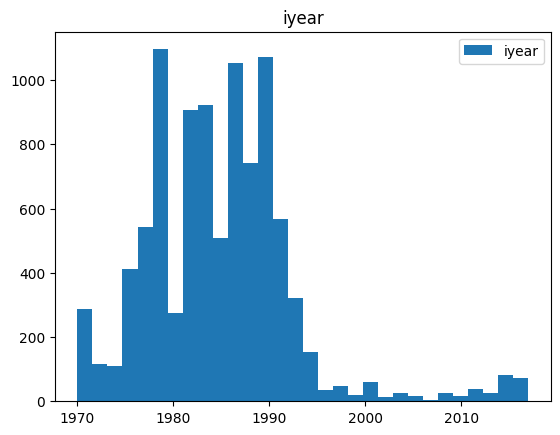

In [108]:
prop_damage_by_years.hist(column='iyear',
                          bins=30,
                          legend=True,
                          grid=False,
                          xlabelsize=10
                         )

#### Powyższy wykres przedstawia straty na podstawie danych z naszego df (w milionach $)
#### Warto jednak wziąć pod uwagę że dane oparte są na jedynie 9570 przypadkach z 177245 jakie są zawarte w df

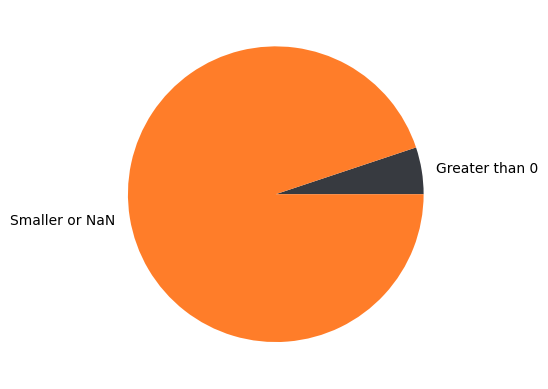

In [109]:
plt.pie([(df['propvalue'] > 0).sum(),len(df['propvalue'])],
              labels=['Greater than 0','Smaller or NaN'],
              colors=['#373A40', '#FF7D29'])
plt.show()

### 2.2) Pokazanie 5 największych incydentów pod względem ilości ofiar, poniesionych strat oraz ilości sprawców

#### 2.2.1) Ofiary w ludziach

In [110]:
df_casualities = df.loc[~df['nkill'].isna()]

In [111]:
df_casualities.sort_values(by='nkill',
                           ascending=False).head(10).iloc[[0,1,2,5,8]][['eventid','iyear','imonth','iday','country_txt','city','nkill','nwound']]

,eventid,iyear,imonth,iday,country_txt,city,nkill,nwound
129346,201406150063,2014.0,6.0,12.0,Iraq,Tikrit,1570.0,NaN
69461,200109110004,2001.0,9.0,11.0,United States,New York City,1384.0,8190.0
69462,200109110005,2001.0,9.0,11.0,United States,New York City,1383.0,8191.0
53039,199404130008,1994.0,4.0,13.0,Rwanda,Gikoro,1180.0,0.0
132088,201408090071,2014.0,8.0,3.0,Iraq,Sinjar,953.0,NaN


#### 2.2.2) Poniesione straty materialne

In [112]:
df_material_losses = df.loc[(
    (~df['propvalue'].isna()) &
    (df['propvalue'] >0)
)]
df_material_losses.sort_values(by='propvalue',
                              ascending=False).head()[['eventid','iyear','imonth','iday','country_txt','city','propvalue']]

,eventid,iyear,imonth,iday,country_txt,city,propvalue
48202,199204100007,1992.0,4.0,10.0,United Kingdom,London,2.700000e+09
59397,199606150004,1996.0,6.0,15.0,United Kingdom,Manchester,1.079120e+09
56003,199504190004,1995.0,4.0,19.0,United States,Oklahoma City,6.520000e+08
16057,198207270011,1982.0,7.0,27.0,Peru,Ayacucho,5.480000e+08
68812,200107240001,2001.0,7.0,24.0,Sri Lanka,Katunayake,3.500000e+08


#### 2.2.3) Ilość sprawców

In [113]:
df_perps = df.loc[df['nperps']>0]
#df_perps.loc[df_perps['nperps'],'nperps']
df_perps['nperps'] = df_perps['nperps'].astype('int') 
#df_perps.loc[df_perps['nperps'],'nperps'] = df_perps['nperps'].astype('int')
df_perps.sort_values(by='nperps',
                    ascending=False).head()[['eventid','iyear','imonth','iday','country_txt','city','nperps']]

/tmp/ipykernel_18251/2889318864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perps['nperps'] = df_perps['nperps'].astype('int')


,eventid,iyear,imonth,iday,country_txt,city,nperps
54267,199409100003,1994.0,9.0,10.0,Bangladesh,Dhaka,25000
61326,199702060002,1997.0,2.0,6.0,Pakistan,Shantinagar,20000
60335,199610100017,1996.0,10.0,10.0,Indonesia,Situbondo,10000
60338,199610100020,1996.0,10.0,10.0,Indonesia,Situbondo,10000
60365,199610100047,1996.0,10.0,10.0,Indonesia,Situbondo,10000


### 2.3) Pokazanie statystyki najczęstszych motywów ataków oraz kategorii sprawców i ofiar

#### 2.3.1) Motywacja sprawców

#### Uwaga, zgodnie z 'GTD Codebook' motywy są systematycznie uzupełniane dopiero od 1997

In [120]:
df_motives = df.loc[(
    (~df['motive'].isna()) &
    (df['motive'] != 'None') &
    (df['motive'] != 'Unknown') &
    (df['motive'] != 'The specific motive for the attack is unknown.')
    
    
)]
df_motives.shape

(21025, 135)

In [121]:
df_motives['motive'].sample(50)

164795    The specific motive is unknown; however, sourc...
66630     Specific motive is unknown but sources specula...
140925    The specific motive is unknown; however, sourc...
28790     To protest the practice of abortion and to sab...
80176     Unknown; the Tigers have been fighting the maj...
72525     Part of a GSPC campaign to destabilize Algeria...
150976    The specific motive is unknown; however, sourc...
66012     The group wanted an end to the vivisection ind...
121364    The specific motive is unknown; however, sourc...
143889    The specific motive is unknown; however, sourc...
97830     The specific motive for the attack is unknown;...
70180     It is suspected that this attack was part of a...
137675    The specific motive is unknown; however, sourc...
114369    The specific motive is unknown; however, a pol...
137674    The specific motive is unknown; however, sourc...
117979    The specific motive is unknown; however, sourc...
101295    Boko Haram claimed responsibil

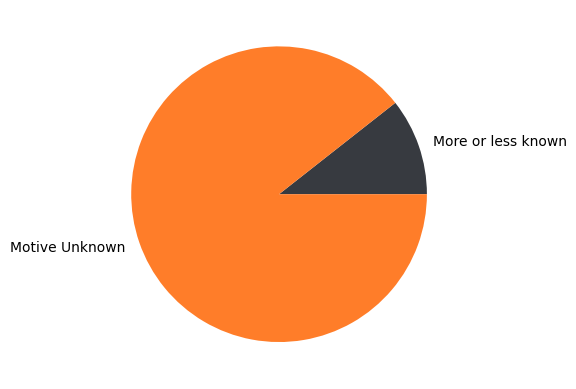

In [137]:
plt.pie([df_motives.shape[0],df.shape[0]],
              labels=['More or less known','Motive Unknown'],
              colors=['#373A40', '#FF7D29'])
plt.show()

#### Po wstępnym przesianiu informacji, okazało się iż w większości przypadków nie ma możliwości ustalenia jednoznacznie motywu.
#### University of Maryland (twórca owej bazy danych) chcąc jak najlepiej oddać zawiłości danych wydarzeń stroni od jednostronnego
#### określenia prostego motywu i kategoryzowania go. Finalnie każdy przypadek należy rozpatrywać oddzielnie

In [139]:
pd.set_option('display.max_colwidth', None)
df_motives['motive'].sample(5)

98110                                                                                                                                                           The specific motive for the attack is unknown; however, it is possible the victim was identified as an infidel and that was the reason for the attack.
104106                                                                                                                                                                                  The specific motive is unknown; however, sources noted that the owner of Alpha OB/GYN clinic is known for providing abortions.
70953                                                                                                                                                                                                                It is suspected that the assailants were attempting to sabotage the upcoming municipal elections.
96050     The specific motive for the attack is unknown but the vic

In [140]:
pd.set_option('display.max_colwidth', 60)

#### 2.3.2) Ustalenie najczęstszych sprawców

In [141]:
df['gname'] = df['gname'].astype('str')

In [142]:
df['gname'].value_counts().head(10)

gname
Unknown                                             81480
Taliban                                              7457
Islamic State of Iraq and the Levant (ISIL)          5584
Shining Path (SL)                                    4306
Al-Shabaab                                           3274
Farabundo Marti National Liberation Front (FMLN)     2991
Irish Republican Army (IRA)                          2662
New People's Army (NPA)                              2502
Boko Haram                                           2408
Revolutionary Armed Forces of Colombia (FARC)        2332
Name: count, dtype: int64

#### 2.3.2) Ustalenie najczęstszych ofiar ataków

In [143]:
df['targsubtype1'].fillna(value=0.0)
df.loc[df['targsubtype1'].isna(),'targsubtype1'] = 0.0
df['targsubtype1'] = df['targsubtype1'].astype(int)

In [144]:
df['targsubtype1'].value_counts().head()

targsubtype1
67    11395
25    11003
0     10272
34     7825
29     7621
Name: count, dtype: int64

#### Zgodnie z 'GTD Codebook': 
#### 67 = Unnamed Civilian/Unspecified
#### 25 = Police Security Forces/Officers
#### 0  = Brak informacji 
#### 34 = Military Personnel (soldiers, troops, officers, forces)
#### 29 = Military Unit/Patrol/Convoy

## 3) Transformacja danych. Zmniejszenie ilości kolumn i wierszy

### 3.1) Ustalenie celów przeprowadzania analizy i odrzucenie kolumn niezawierających przydatnych informacji

#### Cele dalszej analizy danych
#### 3.1.1) Cel 1: Ustalenie zależności pomiędzy zapłaceniem okupu, a przeżywalnością zakładników (w przypadku incydentów z wymuszaniem okupu)
#### 3.1.2) Cel 2: Pokazanie trendów jeśli chodzi o wykorzystywaną broń na przestrzeni lat
#### 3.1.3) Cel 3: Pokazanie trendów śmiertelności ataków (proporcje pomiędzy zmarłymi i rannymi)


In [145]:
df_transformed = df[['eventid',
                     'iyear', 
                     'success',
                     'attacktype1',
                     'attacktype2',
                     'attacktype3',
                     'weaptype1',
                     'weaptype2',
                     'weaptype3',
                     'weaptype4',
                     'weapsubtype1',
                     'weapsubtype2',
                     'weapsubtype3',
                     'weapsubtype4',
                     'nkill',
                     'nwound',
                     'nhostkid',
                     'ransom',
                     'ransompaid',
                     'hostkidoutcome',
                     'nreleased'
                    ]]
df_transformed

,eventid,iyear,success,attacktype1,attacktype2,attacktype3,weaptype1,weaptype2,weaptype3,weaptype4,weapsubtype1,weapsubtype2,weapsubtype3,weapsubtype4,nkill,nwound,nhostkid,ransom,ransompaid,hostkidoutcome,nreleased
0,197000000001,1970.0,1.0,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN
1,197001000001,1970.0,1.0,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN
2,197001000002,1970.0,1.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,197001000003,1970.0,1.0,7.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,197001010002,1970.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177240,201712310022,2017.0,1.0,2.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
177241,201712310029,2017.0,1.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,2.0,7.0,NaN,NaN,NaN,NaN,NaN
177242,201712310030,2017.0,1.0,7.0,NaN,NaN,8.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
177243,201712310031,2017.0,0.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### 3.1.1) Cel 1: Ustalenie zależności pomiędzy zapłaceniem okupu, a przeżywalnością zakładników (w przypadku incydentów z wymuszaniem okupu)

In [146]:
df_t_hostages = df_transformed.loc[(
    (~df_transformed['nhostkid'].isna()) & # porwano co najmniej 1 osobę
    (df_transformed['ransom'] == 1)        # domagano się okupu 
)]
df_t_hostages.loc[df_t_hostages['hostkidoutcome'].isna(),'hostkidoutcome'] = df_t_hostages['hostkidoutcome'].fillna(0.0)
df_t_hostages_ransom_worked = df_t_hostages.loc[(
    (df_t_hostages['success'] == 1) & # porwanie zakończyło się sukcesem
    (df_t_hostages['ransompaid']>0) & # okup został opłacony
    (df_t_hostages['nhostkid'] == df_t_hostages['nreleased']) & # ilość osób wypuszczonych jest taka sama jak porwanych
    (df_t_hostages['hostkidoutcome'] == 2) # wszyscy porwani przeżyli i zostali wypuszczeni
)]
df_t_hostages_ransom_not_worked = df_t_hostages.loc[(
    (df_t_hostages['success'] == 1) & # porwanie zakończyło się sukcesem
    (df_t_hostages['ransompaid']>0) & # okup został opłacony
    (df_t_hostages['nhostkid'] != df_t_hostages['nreleased']) & # ilość osób wypuszczonych jest inna jak porwanych
    (df_t_hostages['hostkidoutcome'] != 2) # porwani nie zostali uwolnieni, nie przeżyli lub ich los jest nieznany
)]
ransom_worked_years = df_t_hostages_ransom_worked['iyear'].value_counts(sort=False)
ransom_worked_years.index.tolist()
ransom_worked_years_list = []
for x in range(len(ransom_worked_years)):
    year = ransom_worked_years.index.tolist()[x]
    num = ransom_worked_years.values[x]
    ransom_worked_years_list.append([year, num])
ransom_worked_years_df = pd.DataFrame(data=ransom_worked_years_list,
                                     columns=['iyear', 'times_ransom_worked'])
ransom_not_worked_years = df_t_hostages_ransom_not_worked['iyear'].value_counts(sort=False)
ransom_not_worked_years.index.tolist()
ransom_not_worked_years_list = []
for x in range(len(ransom_not_worked_years)):
    year = ransom_not_worked_years.index.tolist()[x]
    num = ransom_not_worked_years.values[x]
    ransom_not_worked_years_list.append([year, num])
ransom_not_worked_years_df = pd.DataFrame(data=ransom_not_worked_years_list,
                                     columns=['iyear', 'times_ransom_not_worked'])
df_ransom = pd.merge(ransom_worked_years_df,ransom_not_worked_years_df,
                    how='left',
                    on='iyear')
df_ransom.loc[df_ransom['times_ransom_not_worked'].isna(),'times_ransom_not_worked'] =  df_ransom['times_ransom_not_worked'].fillna(0.0)
df_ransom.loc[~df_ransom['times_ransom_not_worked'].isna(),'times_ransom_not_worked']= df_ransom['times_ransom_not_worked'].astype(int)

In [147]:
df_ransom.head()

,iyear,times_ransom_worked,times_ransom_not_worked
0,1970.0,2,1.0
1,1971.0,2,1.0
2,1972.0,3,1.0
3,1973.0,9,1.0
4,1974.0,4,0.0


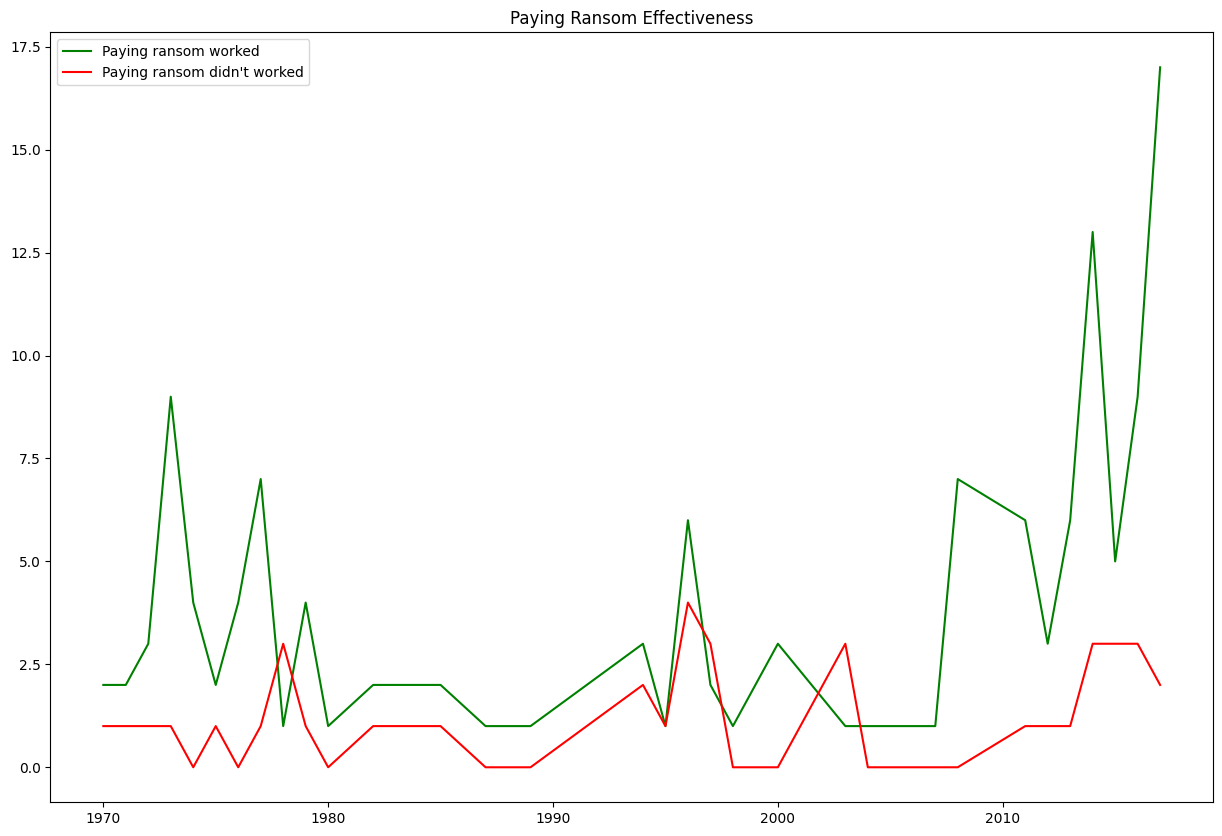

In [148]:
plt.figure(figsize=(15,10))
plt.title('Paying Ransom Effectiveness')
plt.plot(df_ransom['iyear'] ,
         df_ransom['times_ransom_worked'],
         color='green',
         label='Paying ransom worked'
        )
plt.plot(df_ransom['iyear'] ,
         df_ransom['times_ransom_not_worked'],
         color='red',
         label="Paying ransom didn't worked"
        )
plt.legend()
plt.show()

### 3.1.2) Cel 2: Pokazanie trendów jeśli chodzi o wykorzystywaną broń na przestrzeni lat

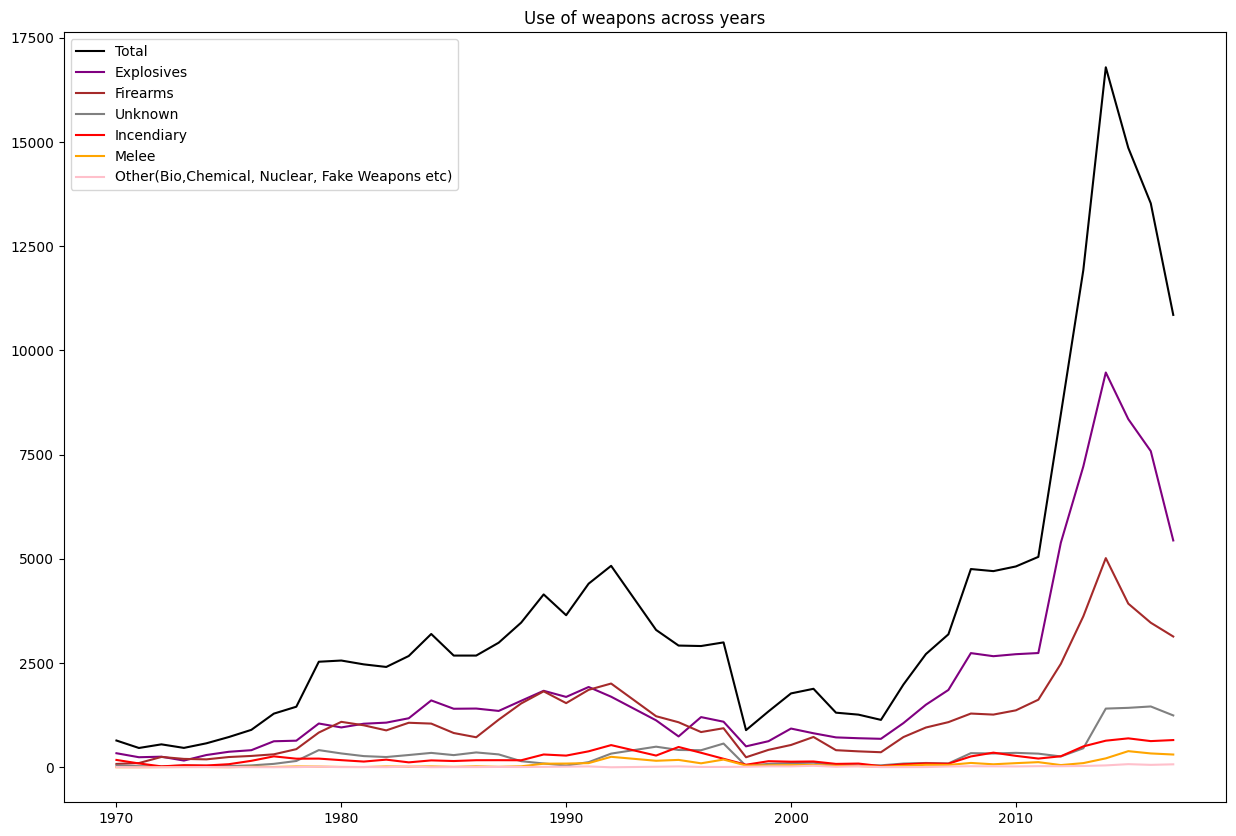

In [185]:
df_years_list = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plt.figure(figsize=(15,10))
plt.title('Use of weapons across years')


plt.plot(df_years_list,
         df_weapons_yo.sort_values(by='iyear', ascending=True)['iyear'].value_counts(sort=False).values,
         color='black',
         label='Total',
         )

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==6.0].value_counts(sort=False).tolist(),
        color='purple',
        label='Explosives')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==5.0].value_counts(sort=False).tolist(),
        color='brown',
        label='Firearms')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==13.0].value_counts(sort=False).tolist(),
        color='grey',
        label='Unknown')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==8.0].value_counts(sort=False).tolist(),
        color='red',
        label='Incendiary')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==9.0].value_counts(sort=False).tolist(),
        color='orange',
        label='Melee')

other= df_weapons_yo.loc[df_weapons_yo['weaptype1'].isin([1.0,2.0,3.0,4.0,7.0,10.0,11.0,12.0]), 'iyear'].value_counts(sort=False).tolist()
other.insert(22,0)
plt.plot(df_years_list,
         other,
        color='pink',
        label='Other(Bio,Chemical, Nuclear, Fake Weapons etc)')


plt.legend()
plt.show()

### 3.1.3) Cel 3: Pokazanie trendów śmiertelności ataków (proporcje pomiędzy zmarłymi i rannymi)

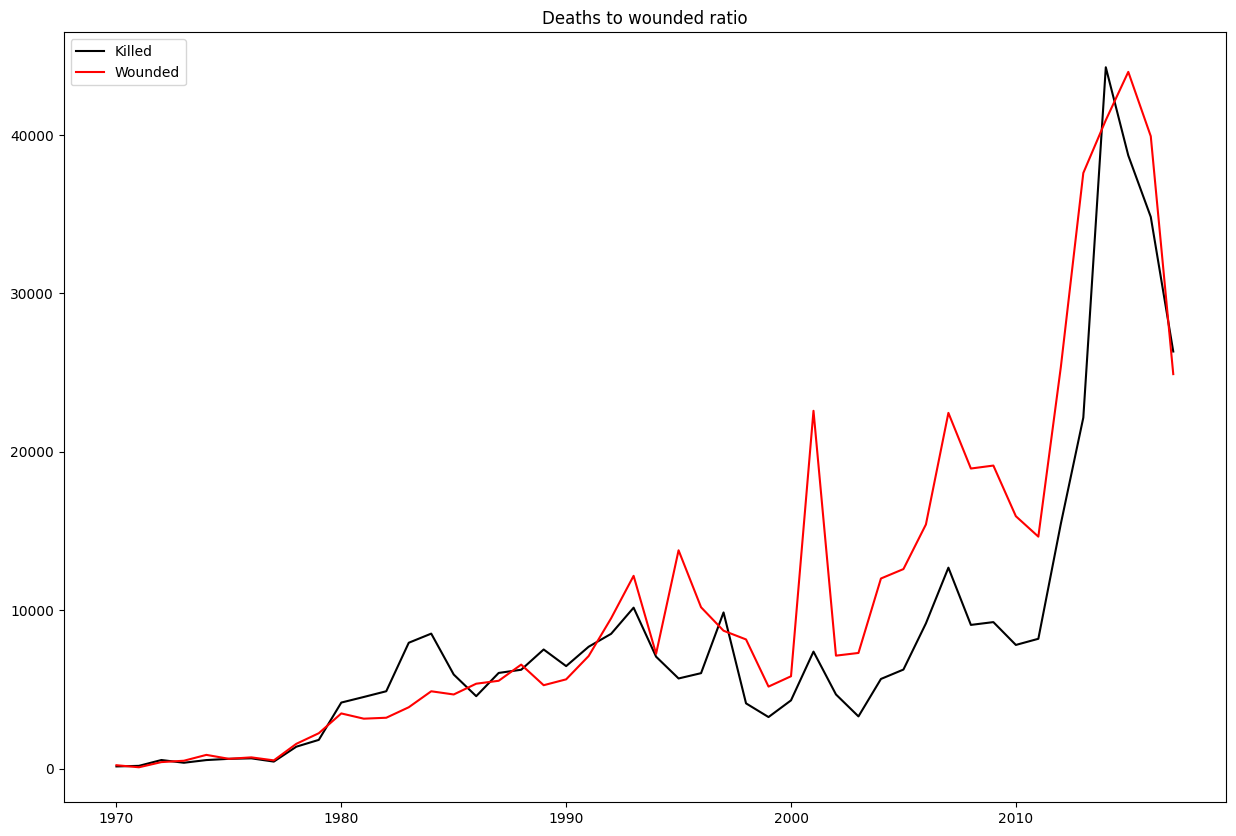

In [154]:
df_transformed.loc[df_transformed['nkill'].isna(), 'nkill'] = 0
df_transformed.loc[df_transformed['nwound'].isna(), 'nwound'] = 0
df_years_list.insert(23,1993)
plt.figure(figsize=(15,10))
plt.title('Deaths to wounded ratio')

plt.plot(df_years_list,
         df_transformed[['iyear','nkill']].groupby('iyear')['nkill'].sum().values,
         color='black',
         label='Killed',
        )
plt.plot(df_years_list,
         df_transformed[['iyear','nwound']].groupby('iyear')['nwound'].sum().values,
         color='red',
         label='Wounded',
        )
plt.legend()
plt.show()

# 4) Wyniki i wnioski

### 4.1) Przedstawienie konkluzji czy opłacenie okupu wpływa na przeżywalność zakładników

#### Biorąc pod uwagę wyniki naszej analizy, możemy określić na podstawie 1166 przypadków z lat od 1970 do 2017, że w przypadku, gdy porywacze domagają się okupu, wzrasta przeżywalność tych porwanych, za których okup opłacono. Trend umacnia się od 2005 roku i można przyjąć, że w następnych latach najprawdowodobnie się utrzyma.

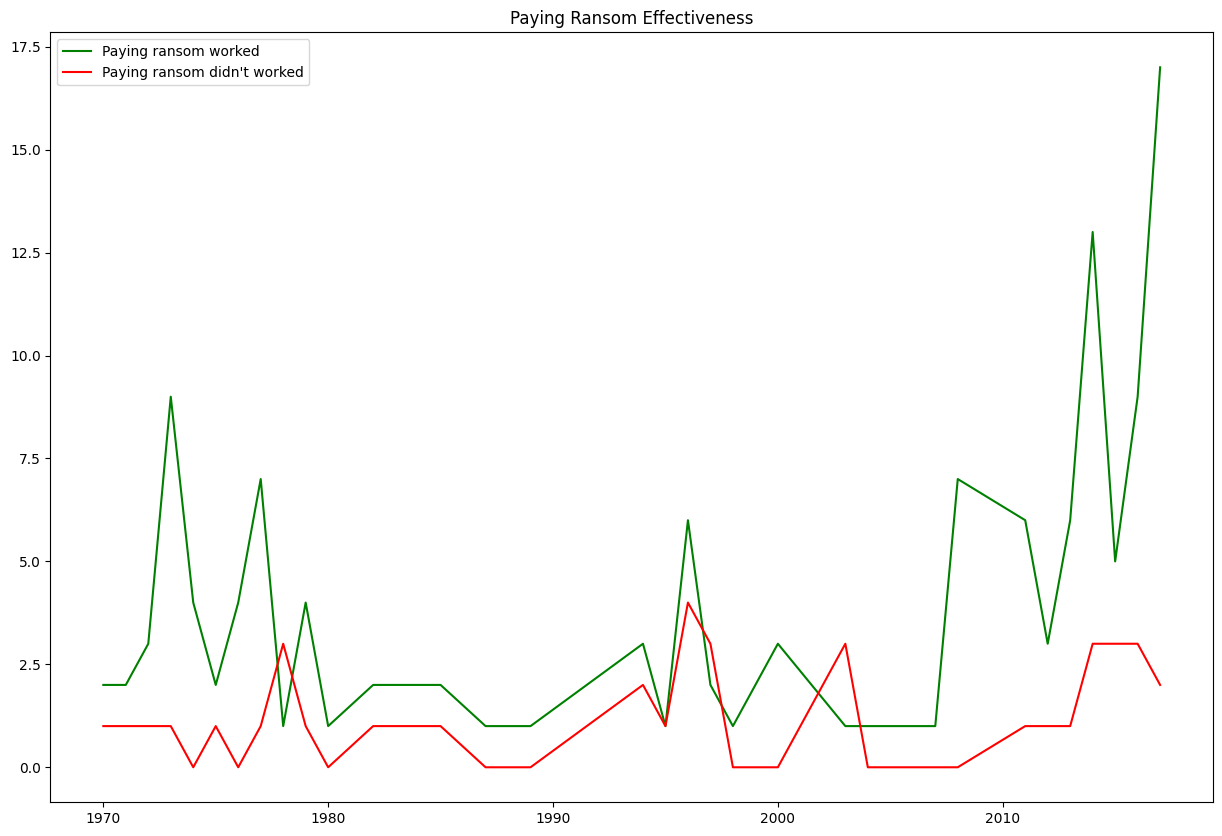

In [159]:
plt.figure(figsize=(15,10))
plt.title('Paying Ransom Effectiveness')
plt.plot(df_ransom['iyear'] ,
         df_ransom['times_ransom_worked'],
         color='green',
         label='Paying ransom worked'
        )
plt.plot(df_ransom['iyear'],
         df_ransom['times_ransom_not_worked'],
         color='red',
         label="Paying ransom didn't worked"
        )
plt.legend()
plt.show()

### 4.2) Ustalenie jakiego rodzaju broń może zostać użyta w atakach w przyszłości (na podstawie wykazanych trendów)

#### Na podstawie naszej analizy możemy określić, że od 2005 roku systematycznie rośnie ilość aktów terrorystycznych. Głównymi kategoriami wykorzystywanych broni jest broń palna, oraz ładunki wybuchowe. Rośnie również liczba przypadków nieokreślonej bądź nieznanej broni. 

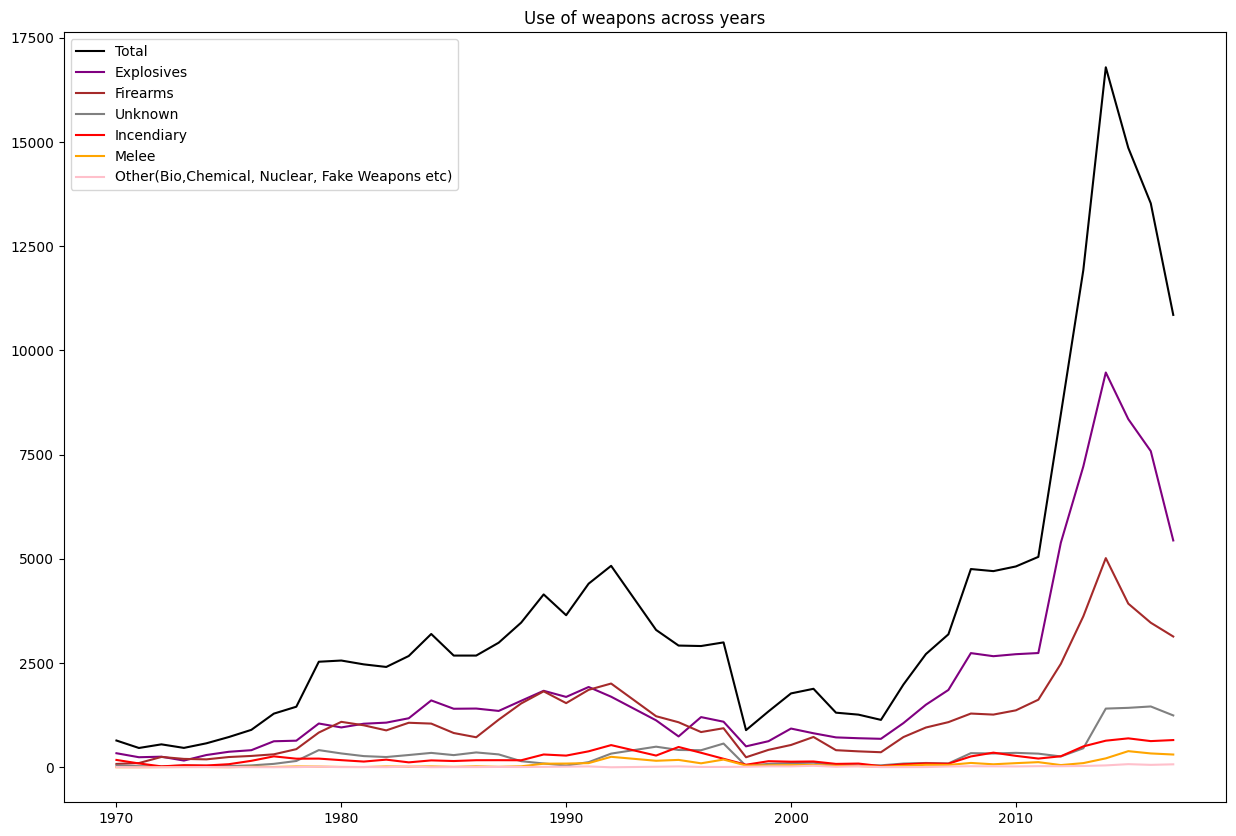

In [187]:
df_years_list = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plt.figure(figsize=(15,10))
plt.title('Use of weapons across years')


plt.plot(df_years_list,
         df_weapons_yo.sort_values(by='iyear', ascending=True)['iyear'].value_counts(sort=False).values,
         color='black',
         label='Total',
         )

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==6.0].value_counts(sort=False).tolist(),
        color='purple',
        label='Explosives')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==5.0].value_counts(sort=False).tolist(),
        color='brown',
        label='Firearms')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==13.0].value_counts(sort=False).tolist(),
        color='grey',
        label='Unknown')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==8.0].value_counts(sort=False).tolist(),
        color='red',
        label='Incendiary')

plt.plot(df_years_list,
         df_weapons_yo.loc[df_weapons_yo['weaptype1']==9.0].value_counts(sort=False).tolist(),
        color='orange',
        label='Melee')

other= df_weapons_yo.loc[df_weapons_yo['weaptype1'].isin([1.0,2.0,3.0,4.0,7.0,10.0,11.0,12.0]), 'iyear'].value_counts(sort=False).tolist()
other.insert(22,0)
plt.plot(df_years_list,
         other,
        color='pink',
        label='Other(Bio,Chemical, Nuclear, Fake Weapons etc)')


plt.legend()
plt.show()

### 4.3) Określenie szans na przeżycie ataku na przestrzeni lat

#### Od 1998 widać było utrzymującą się korelację wskazującą na to, że więcej osób przeżywało atak terrorystyczny niż w nim ginęło. W ostatnich jednak latach, śmiertelność zaczęła się zwiększać. Na ten moment nie można określić jednoznacznego trendu w tej kwestii 

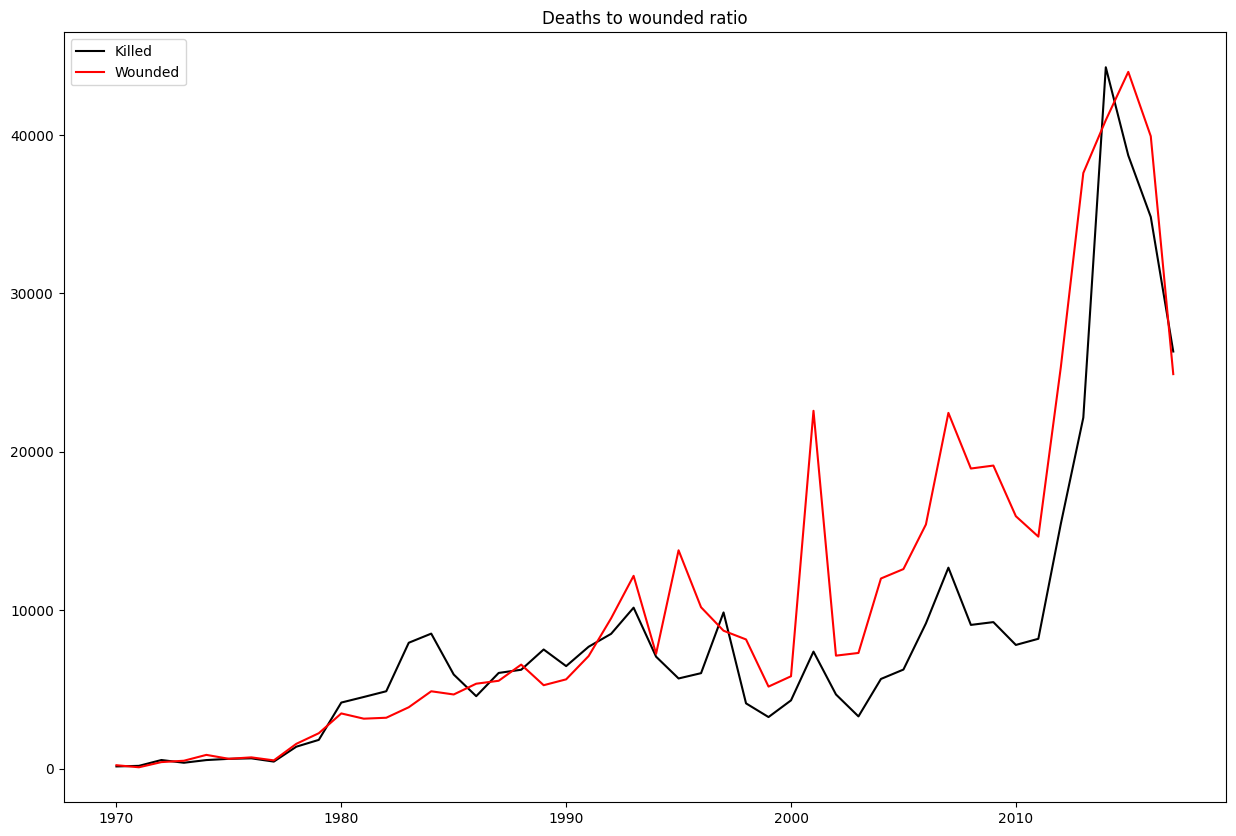

In [188]:
df_transformed.loc[df_transformed['nkill'].isna(), 'nkill'] = 0
df_transformed.loc[df_transformed['nwound'].isna(), 'nwound'] = 0
df_years_list.insert(23,1993)
plt.figure(figsize=(15,10))
plt.title('Deaths to wounded ratio')

plt.plot(df_years_list,
         df_transformed[['iyear','nkill']].groupby('iyear')['nkill'].sum().values,
         color='black',
         label='Killed',
        )
plt.plot(df_years_list,
         df_transformed[['iyear','nwound']].groupby('iyear')['nwound'].sum().values,
         color='red',
         label='Wounded',
        )
plt.legend()
plt.show()